In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('diabetes.csv')

# Display the first five rows of the dataset
print(df.head())

# Print the shape of the DataFrame
print("Shape of DataFrame:", df.shape)

# List all column names
print("Column names:", df.columns.tolist())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Shape of DataFrame: (768, 9)
Column names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


Incomplete task, missing code for Number of rows dropped due to missing values

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('diabetes.csv')

# Step 1: Detect and print the number of missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Step 2: Drop rows with any missing values
df_cleaned = df.dropna()

# Step 3: Remove duplicate rows and print the number of rows removed
initial_shape = df_cleaned.shape
df_cleaned = df_cleaned.drop_duplicates()
rows_removed = initial_shape[0] - df_cleaned.shape[0]
print("Number of duplicate rows removed:", rows_removed)

# Step 4: Print the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", df_cleaned.shape)

Missing values in each column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Number of duplicate rows removed: 0
Shape of cleaned DataFrame: (768, 9)


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the CSV file into a DataFrame
df = pd.read_csv('diabetes.csv')

# Step 1: Encode the Outcome column using LabelEncoder
label_encoder = LabelEncoder()
df['Outcome'] = label_encoder.fit_transform(df['Outcome'])

# Step 2: Apply standard scaling to all numeric features except Outcome
scaler = StandardScaler()
numeric_features = df.drop('Outcome', axis=1)  # Exclude Outcome for scaling
scaled_features = scaler.fit_transform(numeric_features)

# Create a new DataFrame with scaled features and the encoded Outcome
df_scaled = pd.DataFrame(scaled_features, columns=numeric_features.columns)
df_scaled['Outcome'] = df['Outcome']

# Display the transformed DataFrame
print(df_scaled.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the processed DataFrame (ensure this is the scaled DataFrame from previous steps)
df = pd.read_csv('diabetes.csv')  # Replace with actual path if needed

# Step 1: Split the DataFrame into training and test sets (80-20 split)
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']                # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 3: Print model parameters and confirm training completion
print("Model parameters:")
print(clf.get_params())
print("Training completed successfully.")

Model parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Training completed successfully.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the processed DataFrame (ensure this is the scaled DataFrame from previous steps)
df = pd.read_csv('diabetes.csv')  # Replace with actual path if needed

# Prepare the data (same as before)
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier (if not already done)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 1: Make predictions on the test set
y_pred = clf.predict(X_test)

# Step 2: Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Step 3: Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Step 4: Print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy Score: 0.7467532467532467
Confusion Matrix:
 [[75 24]
 [15 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



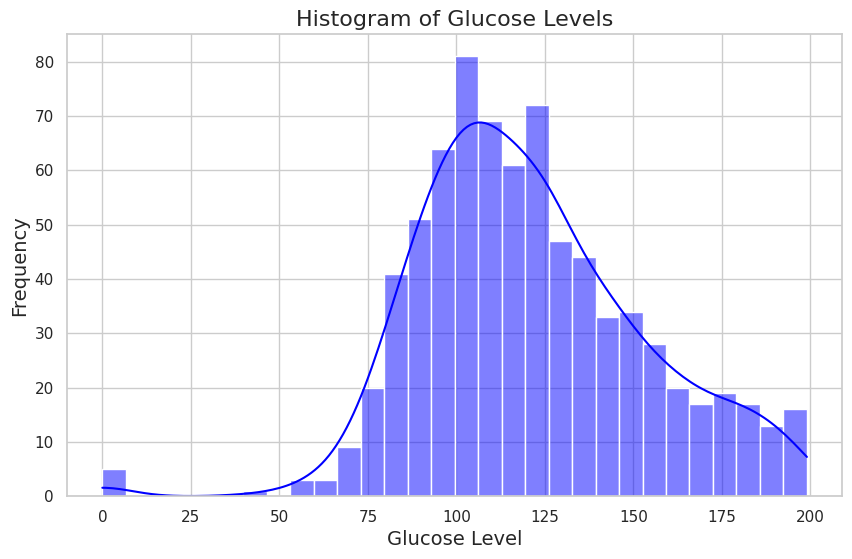

<Figure size 1200x1000 with 0 Axes>

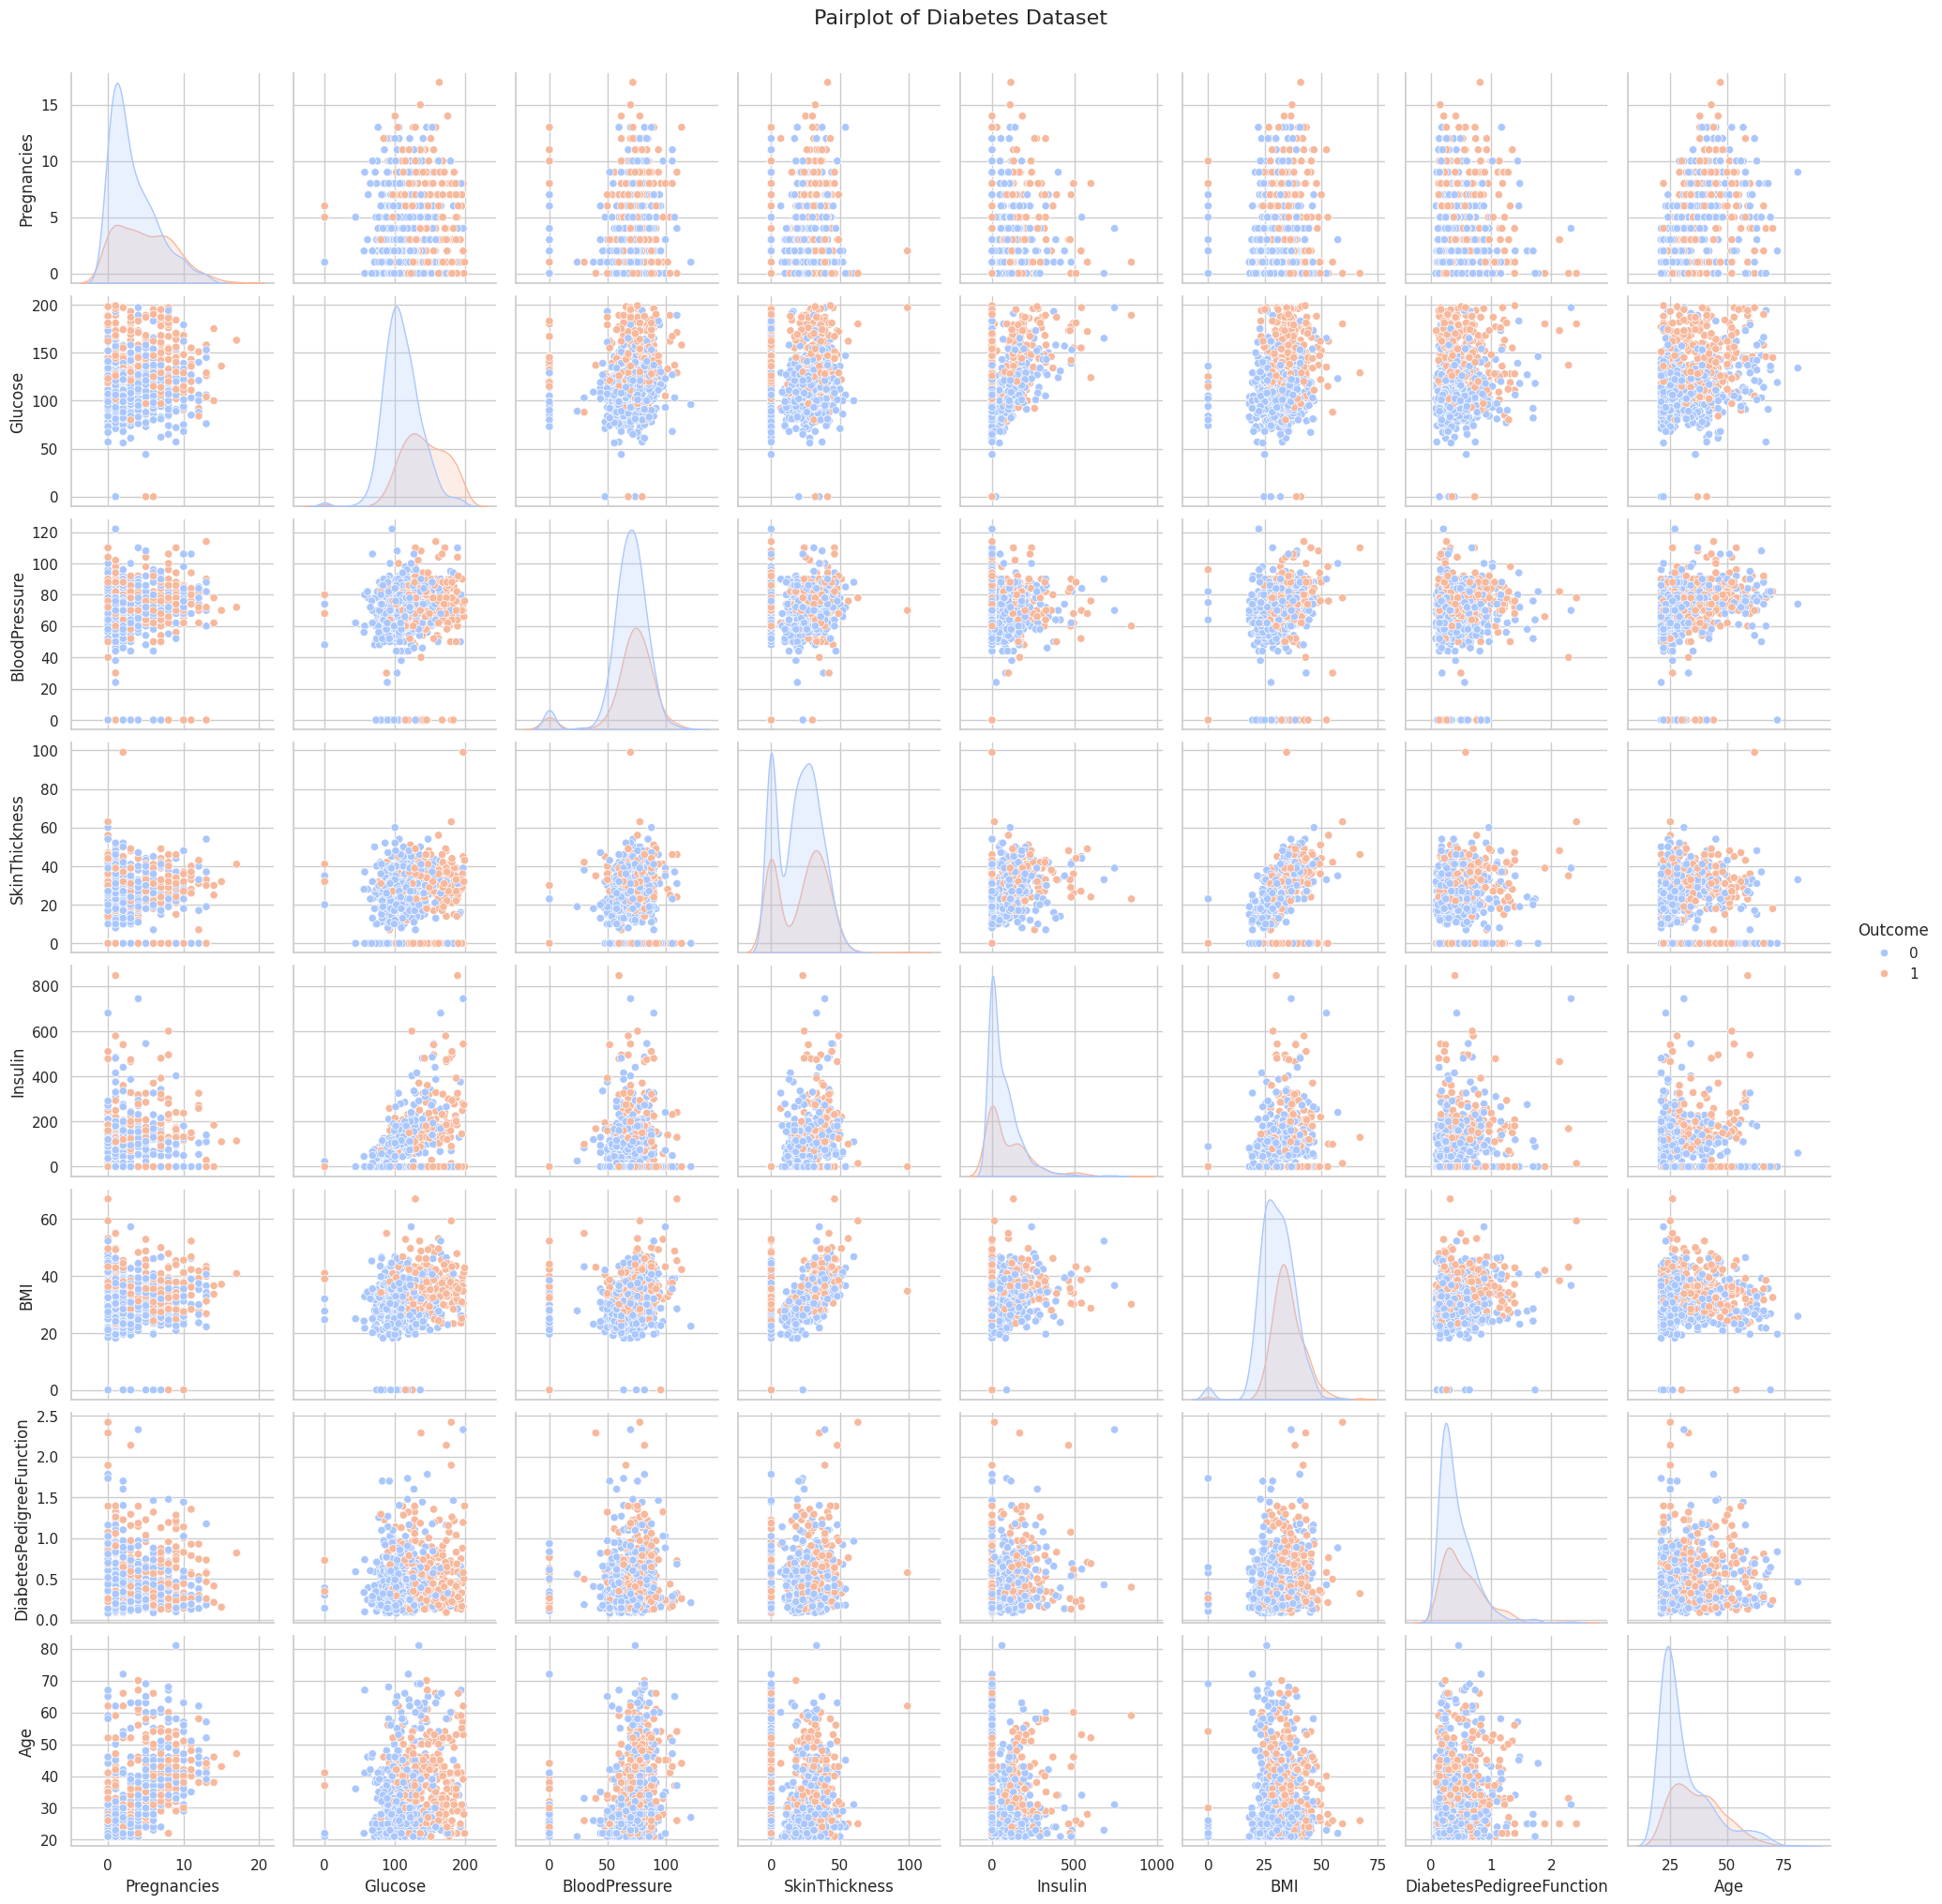

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the processed DataFrame (ensure this is the scaled DataFrame from previous steps)
df = pd.read_csv('diabetes.csv')  # Replace with actual path if needed

# Set the style for the plots
sns.set(style="whitegrid")

# Step 1: Create a histogram of the Glucose column
plt.figure(figsize=(10, 6))
sns.histplot(df['Glucose'], bins=30, kde=True, color='blue')
plt.title('Histogram of Glucose Levels', fontsize=16)
plt.xlabel('Glucose Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# Step 2: Generate a seaborn pairplot of the entire dataset, colored by the Outcome column
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(df, hue='Outcome', palette='coolwarm', diag_kind='kde')
pairplot.fig.suptitle('Pairplot of Diabetes Dataset', y=1.02, fontsize=16)
plt.show()